In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import numpy.random as nr
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [2]:
df_aw_custs = pd.read_csv('./AdvWorksCusts.csv')
df_aw_spend = pd.read_csv('./AW_AveMonthSpend.csv')
df_aw_bike_buyer = pd.read_csv('./AW_BikeBuyer.csv')

In [3]:
print(df_aw_custs.head())
print(df_aw_spend.head())
print(df_aw_bike_buyer.head())

   CustomerID Title  FirstName MiddleName LastName Suffix  \
0       11000   NaN        Jon          V     Yang    NaN   
1       11001   NaN     Eugene          L    Huang    NaN   
2       11002   NaN      Ruben        NaN   Torres    NaN   
3       11003   NaN    Christy        NaN      Zhu    NaN   
4       11004   NaN  Elizabeth        NaN  Johnson    NaN   

          AddressLine1 AddressLine2         City StateProvinceName  \
0      3761 N. 14th St          NaN  Rockhampton        Queensland   
1           2243 W St.          NaN      Seaford          Victoria   
2     5844 Linden Land          NaN       Hobart          Tasmania   
3     1825 Village Pl.          NaN   North Ryde   New South Wales   
4  7553 Harness Circle          NaN   Wollongong   New South Wales   

       ...        BirthDate   Education    Occupation Gender MaritalStatus  \
0      ...       1966-04-08  Bachelors   Professional      M             M   
1      ...       1965-05-14  Bachelors   Professional   

In [4]:
print(df_aw_spend.describe())
print(df_aw_spend.shape)
print(df_aw_spend.CustomerID.unique().shape)

         CustomerID  AveMonthSpend
count  16519.000000   16519.000000
mean   20234.225195      72.405957
std     5342.515987      27.285370
min    11000.000000      22.000000
25%    15604.500000      52.000000
50%    20221.000000      68.000000
75%    24860.500000      84.000000
max    29482.000000     176.000000
(16519, 2)
(16404,)


In [5]:
df_aw_spend.drop_duplicates(inplace=True, keep='last', subset="CustomerID")


In [6]:
df_aw_spend.describe()

,CustomerID,AveMonthSpend
count,16404.000000,16404.000000
mean,20240.143136,72.391002
std,5340.370705,27.269921
min,11000.000000,22.000000
25%,15617.750000,52.000000
50%,20231.500000,68.000000
75%,24862.250000,84.000000
max,29482.000000,176.000000


In [7]:
print(df_aw_bike_buyer.describe())
print(df_aw_bike_buyer.shape)
print(df_aw_bike_buyer.CustomerID.unique().shape)

         CustomerID     BikeBuyer
count  16519.000000  16519.000000
mean   20234.225195      0.332284
std     5342.515987      0.471046
min    11000.000000      0.000000
25%    15604.500000      0.000000
50%    20221.000000      0.000000
75%    24860.500000      1.000000
max    29482.000000      1.000000
(16519, 2)
(16404,)


In [8]:
df_aw_bike_buyer.drop_duplicates(inplace=True, keep='last', subset="CustomerID")

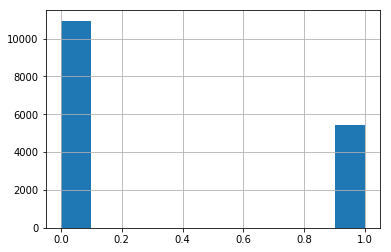

In [9]:
df_aw_bike_buyer.BikeBuyer.hist()

In [10]:
print(df_aw_custs.shape)
print(df_aw_custs.CustomerID.unique().shape)

(16519, 23)
(16404,)


In [11]:
df_aw_custs.drop_duplicates(inplace=True, keep='last', subset="CustomerID")

In [12]:
df_aw_custs[["YearlyIncome", "Occupation"]].groupby("Occupation").median()

,YearlyIncome
Occupation,
Clerical,49481.0
Management,118781.0
Manual,21722.0
Professional,99058.0
Skilled Manual,66471.5


In [13]:
df_aw_spend.head()

,CustomerID,AveMonthSpend
0,11000,89
1,11001,117
2,11002,123
3,11003,50
4,11004,95


In [14]:
df_aw_custs.set_index("CustomerID", inplace=True)
df_aw_spend.set_index("CustomerID", inplace=True)
df_aw_bike_buyer.set_index("CustomerID", inplace=True)

In [15]:
print(df_aw_spend.head())
df_joined = df_aw_custs.join(df_aw_spend)
df_joined = df_joined.join(df_aw_bike_buyer)
print(df_joined[["AveMonthSpend"]].head())

            AveMonthSpend
CustomerID               
11000                  89
11001                 117
11002                 123
11003                  50
11004                  95
            AveMonthSpend
CustomerID               
11000                  89
11001                 117
11002                 123
11003                  50
11004                  95


In [16]:
print(df_joined.columns)
df_joined[["Gender", "AveMonthSpend", "BirthDate"]]
df_joined.dtypes
df_joined["Age"] = (pd.Timestamp("1998-01-01") - pd.to_datetime(df_joined["BirthDate"])).astype('<m8[Y]').astype("int")

Index(['Title', 'FirstName', 'MiddleName', 'LastName', 'Suffix',
       'AddressLine1', 'AddressLine2', 'City', 'StateProvinceName',
       'CountryRegionName', 'PostalCode', 'PhoneNumber', 'BirthDate',
       'Education', 'Occupation', 'Gender', 'MaritalStatus', 'HomeOwnerFlag',
       'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren',
       'YearlyIncome', 'AveMonthSpend', 'BikeBuyer'],
      dtype='object')


In [17]:
def age_group(age):
    if age < 25:
        return "<25"
    elif age < 45:
        return "25-45"
    elif age < 55:
        return "45-55"
    else:
        return ">=55"

In [18]:
df_joined["AgeGroup"] = df_joined["Age"].map(age_group)

In [19]:
df_joined[["AgeGroup", "BikeBuyer"]].groupby("AgeGroup").count()


,BikeBuyer
AgeGroup,
25-45,9981
45-55,2437
<25,2932
>=55,1054


In [20]:
df_joined.dtypes

Title                   object
FirstName               object
MiddleName              object
LastName                object
Suffix                  object
AddressLine1            object
AddressLine2            object
City                    object
StateProvinceName       object
CountryRegionName       object
PostalCode              object
PhoneNumber             object
BirthDate               object
Education               object
Occupation              object
Gender                  object
MaritalStatus           object
HomeOwnerFlag            int64
NumberCarsOwned          int64
NumberChildrenAtHome     int64
TotalChildren            int64
YearlyIncome             int64
AveMonthSpend            int64
BikeBuyer                int64
Age                      int32
AgeGroup                object
dtype: object

In [43]:
df_joined = df_joined[["Age","AgeGroup","YearlyIncome", "Education", "Occupation", "Gender", "MaritalStatus","HomeOwnerFlag","NumberCarsOwned","NumberChildrenAtHome","TotalChildren","AveMonthSpend","BikeBuyer"]]

In [44]:
df_joined["BikeBuyer"] = df_joined["BikeBuyer"].astype("category")
df_joined["HomeOwnerFlag"] = df_joined["HomeOwnerFlag"].astype("category")
df_joined["MaritalStatus"] = df_joined["MaritalStatus"].astype("category")


In [47]:
df_joined[["AgeGroup", "BikeBuyer", "Gender"]].groupby(["AgeGroup", "Gender"]).describe()

BikeBuyer                 
                    count unique top  freq
AgeGroup Gender                           
25-45    F           4914      2   0  3288
         M           5067      2   1  2583
45-55    F           1210      2   0   961
         M           1227      2   0   973
<25      F           1456      2   0  1116
         M           1476      2   0  1113
>=55     F            534      2   0   516
         M            520      2   0   498

In [24]:
def plot_box(data, cols_y, col_x = 'BikeBuyer', hue = "BikeBuyer"):
    for col_y in cols_y:
        sns.set_style("whitegrid")
        sns.boxplot(x=col_x, y=col_y, data=data, palette='RdBu_r', hue = hue)
        plt.xlabel(col_x) # Set text for the x axis
        plt.ylabel(col_y)# Set text for y axis
        plt.show()
        

cols = ["AveMonthSpend", "YearlyIncome", "Age", "NumberChildrenAtHome", "TotalChildren", "NumberCarsOwned"]
plot_box(df_joined, cols)

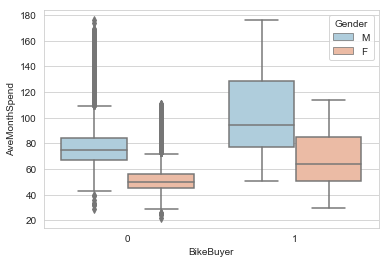

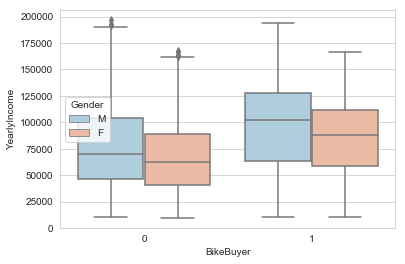

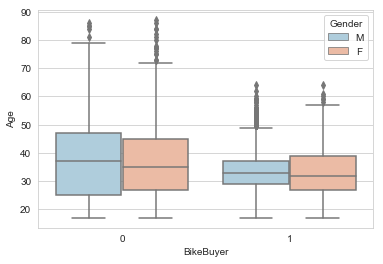

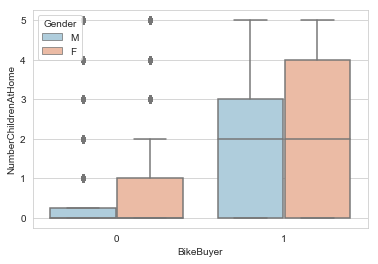

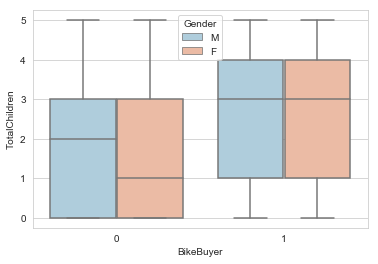

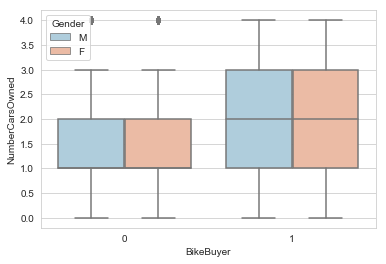

In [48]:
cols = ["AveMonthSpend", "YearlyIncome", "Age", "NumberChildrenAtHome", "TotalChildren", "NumberCarsOwned"]
plot_box(df_joined, cols, "BikeBuyer", "Gender")

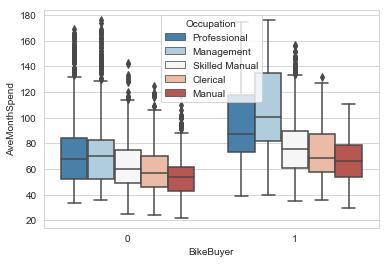

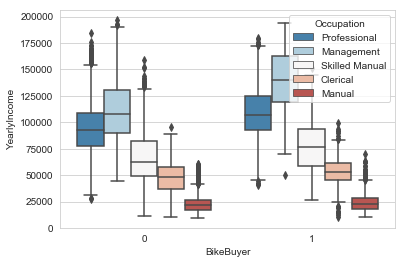

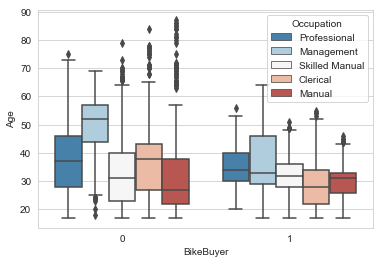

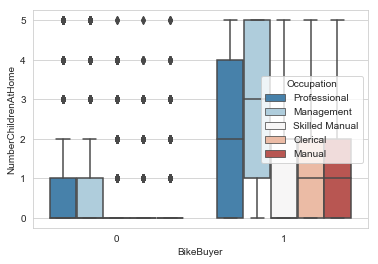

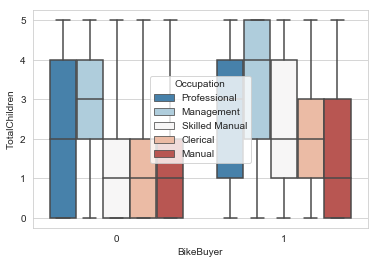

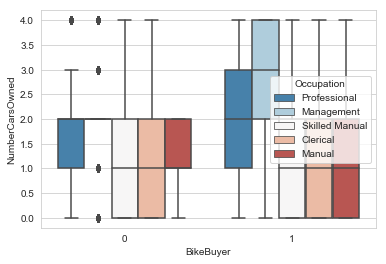

In [27]:
cols = ["AveMonthSpend", "YearlyIncome", "Age", "NumberChildrenAtHome", "TotalChildren", "NumberCarsOwned"]
plot_box(df_joined, cols, "BikeBuyer", "Occupation")

In [28]:
df_joined.index

Int64Index([11000, 11001, 11002, 11003, 11004, 11005, 11006, 11007, 11008,
            11009,
            ...
            13139, 18651, 24992, 11442, 18487, 13121, 26100, 11328, 23077,
            18982],
           dtype='int64', name='CustomerID', length=16404)

In [29]:
df_joined[['BikeBuyer', 'NumberCarsOwned']].groupby('BikeBuyer').describe()


NumberCarsOwned                                             
                    count      mean       std  min  25%  50%  75%  max
BikeBuyer                                                             
0                 10949.0  1.367248  1.021521  0.0  1.0  1.0  2.0  4.0
1                  5455.0  1.765720  1.304599  0.0  1.0  2.0  3.0  4.0

In [30]:
df_joined[['BikeBuyer', 'Occupation']].groupby('Occupation').describe()

BikeBuyer                 
                   count unique top  freq
Occupation                               
Clerical            2597      2   0  1981
Management          2718      2   0  1702
Manual              2129      2   0  1625
Professional        4922      2   0  2738
Skilled Manual      4038      2   0  2903

In [31]:
from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm

In [32]:
def encode_string(cat_features):
    ## First encode the strings to numeric categories
    enc = preprocessing.LabelEncoder()
    enc.fit(cat_features)
    enc_cat_features = enc.transform(cat_features)
    ## Now, apply one hot encoding
    ohe = preprocessing.OneHotEncoder()
    encoded = ohe.fit(enc_cat_features.reshape(-1,1))
    return encoded.transform(enc_cat_features.reshape(-1,1)).toarray()

In [33]:
print(df_joined.head())
print(df_joined.columns)


            Age AgeGroup  YearlyIncome StateProvinceName PostalCode  \
CustomerID                                                            
11000        31    25-45        137947        Queensland       4700   
11001        32    25-45        101141          Victoria       3198   
11002        32    25-45         91945          Tasmania       7001   
11003        29    25-45         86688   New South Wales       2113   
11004        29    25-45         92771   New South Wales       2500   

             Education    Occupation Gender MaritalStatus HomeOwnerFlag  \
CustomerID                                                                
11000       Bachelors   Professional      M             M             1   
11001       Bachelors   Professional      M             S             0   
11002       Bachelors   Professional      M             M             1   
11003       Bachelors   Professional      F             S             0   
11004       Bachelors   Professional      F         

In [34]:
labels = np.array(df_joined['BikeBuyer'])

In [35]:
df_joined[["YearlyIncome","MaritalStatus", "Gender", "NumberCarsOwned", "Age", "AveMonthSpend"]].head()

,YearlyIncome,MaritalStatus,Gender,NumberCarsOwned,Age,AveMonthSpend
CustomerID,,,,,,
11000,137947,M,M,0,31,89
11001,101141,S,M,1,32,117
11002,91945,M,M,1,32,123
11003,86688,S,F,1,29,50
11004,92771,S,F,4,29,95


In [36]:
cols = ["MaritalStatus", "Gender"]
encoded = encode_string(cat_features=cols)


In [37]:
cat_cols = ['BikeBuyer']
plot_box(df_joined, cat_cols, col_y="AveMonthSpend")

TypeError: plot_box() got an unexpected keyword argument 'col_y'

In [ ]:
encoded

In [ ]:
sns.barplot(data=df_joined[["AgeGroup", "AveMonthSpend", "Gender"]], y="AveMonthSpend", x="AgeGroup", hue="Gender")

In [ ]:
Features = encode_string(df_joined['MaritalStatus'])
temp = encode_string(df_joined['Gender'])
Features = np.concatenate([Features, temp], axis = 1)


In [ ]:
Features.shape

In [ ]:
df_joined.shape

In [ ]:
Features = np.concatenate([Features, np.array(df_joined[["YearlyIncome","Age", "AveMonthSpend", "NumberCarsOwned"]])], axis = 1)

In [ ]:
Features[:20, :]

In [ ]:
nr.seed(9988)
size = (int(Features.shape[0] * 0.3))
indx = range(Features.shape[0])
indx = ms.train_test_split(indx, test_size = size)
X_train = Features[indx[0],:]
y_train = np.ravel(labels[indx[0]])
X_test = Features[indx[1],:]
y_test = np.ravel(labels[indx[1]])
X_train[:10]

In [ ]:
scaler = preprocessing.StandardScaler().fit(X_train[:,4:])
X_train[:,4:] = scaler.transform(X_train[:,4:])
X_test[:,4:] = scaler.transform(X_test[:,4:])
X_train[:10,]

In [ ]:
sns.pairplot(pd.DataFrame(X_train))

In [ ]:
sns.pairplot(pd.DataFrame(X_train[:,4:7]))

In [ ]:
import sklearn.metrics as sklm
import sklearn.decomposition as skde

In [ ]:
pca_model = skde.PCA()
pca_fit = pca_model.fit(X_train[:,4:7])
print(pca_fit.explained_variance_ratio_)

In [ ]:
transformed_X = pca_fit.transform(X_train[:,4:7])
transformed_X = np.concatenate([X_train[:,0:4], transformed_X,X_train[:,7:]], axis=1)
print(X_train.shape)
print(transformed_X.shape)
sns.pairplot(pd.DataFrame(transformed_X))